# Tipo cambio de compra y de venta del dólar de los Estados Unidos de América
> Referencia del Banco Central de Costa Rica en colones costarricenses

### Paso 1: Importar datos de un archivo CSV a un DataFrame de Pandas

# Estudiante: Orlando Salazar Acón

In [2]:
import pandas as pd

ruta_archivo_csv = "historico_tipo_cambio.csv"

df = pd.read_csv(ruta_archivo_csv,delimiter=';')

df

,DIA,COMPRA,VENTA,Unnamed: 3,Unnamed: 4
0,1 Ene 1983,44.95,45.45,NaN,NaN
1,2 Ene 1983,44.95,45.45,NaN,NaN
2,3 Ene 1983,44.95,45.45,NaN,NaN
3,4 Ene 1983,44.95,45.45,NaN,NaN
4,5 Ene 1983,44.95,45.45,NaN,NaN
...,...,...,...,...,...
15130,4 May 2024,503.94,511.51,NaN,NaN
15131,5 May 2024,503.94,511.51,NaN,NaN
15132,6 May 2024,503.94,511.51,NaN,NaN
15133,7 May 2024,504.53,512.28,NaN,NaN


## Limpiar y procesar el DataFrame
El DataFrame df tiene las siguientes columnas:

- DIA: Esta columna contiene las fechas del tipo de cmabio.
- COMPRA: Esta columna contiene los precios de compra del dólar.
- VENTA: Esta columna contiene los precios de venta del dólar.
- Unnamed: 3: Esta columna contiene datos no deseados y se puede eliminar.
- Unnamed: 4: Esta columna contiene datos no deseados y se puede eliminar.

In [3]:
print('Shape: ',df.shape)
print('Columnas: ', df.columns)
print('Tipado: \n', df.dtypes)

Shape:  (15135, 5)
Columnas:  Index(['DIA', 'COMPRA', 'VENTA', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
Tipado: 
 DIA            object
COMPRA        float64
VENTA         float64
Unnamed: 3    float64
Unnamed: 4    float64
dtype: object


In [4]:
# Eliminar las columnas en los índices 2 y 3 (asumiendo que 'Unnamed: 3' está en el índice 2 y 'Unnamed: 4' en el índice 3)
df.drop(columns=df.iloc[:, 3:], axis=1, inplace=True) # [3:] selecciona todas las columnas a partir del índice 3 (incluido)


In [5]:
# Eliminar filas con valores nulos en cualquier columna
df.dropna(inplace=True)

df.head()

,DIA,COMPRA,VENTA
0,1 Ene 1983,44.95,45.45
1,2 Ene 1983,44.95,45.45
2,3 Ene 1983,44.95,45.45
3,4 Ene 1983,44.95,45.45
4,5 Ene 1983,44.95,45.45


Convertir la columna 'DIA' a formato de fecha:

In [6]:
# Diccionario de meses en español
meses_español = {
    "ene": "Jan",
    "feb": "Feb",
    "mar": "Mar",
    "abr": "Apr",
    "may": "May",
    "jun": "Jun",
    "jul": "Jul",
    "ago": "Aug",
    "set": "Sep",
    "oct": "Oct",
    "nov": "Nov",
    "dic": "Dec"
}

# Columna 'DIA' con fechas de texto en formato "27 marzo 2024"

# Recorrer cada fecha de texto en la columna 'DIA'
for i in df.index:
    fecha_texto = df.loc[i, 'DIA']

    # Eliminar espacios en blanco antes de dividir
    fecha_texto_sin_espacios = fecha_texto.strip()

    # Dividir la fecha de texto en partes (día, mes, año)
    partes_fecha = fecha_texto_sin_espacios.split()

    # Convertir el mes a inglés usando el diccionario
    mes_ingles = meses_español[partes_fecha[1].lower()]

    # Reconstruir la fecha de texto con el mes en inglés
    fecha_texto_ingles = f"{partes_fecha[0]} {mes_ingles} {partes_fecha[2]}"

    # Convertir la fecha de texto en inglés a un objeto datetime
    try:
        fecha_datetime = pd.to_datetime(fecha_texto_ingles, format="%d %b %Y")
        df.loc[i, 'DIA'] = fecha_datetime
    except ValueError:
        print(f"Error al convertir la fecha: {fecha_texto}")

In [7]:
# Definir el formato de la fecha de texto
formato_fecha = "%d %b %Y"

# Convertir la columna 'DIA' a un objeto datetime
df['DIA'] = pd.to_datetime(df['DIA'], format="%d %b %Y")

In [8]:
# Definir series
anios = df['DIA']
compra = df['COMPRA']
venta = df['VENTA']

In [9]:
df

,DIA,COMPRA,VENTA
0,1983-01-01,44.95,45.45
1,1983-01-02,44.95,45.45
2,1983-01-03,44.95,45.45
3,1983-01-04,44.95,45.45
4,1983-01-05,44.95,45.45
...,...,...,...
15130,2024-05-04,503.94,511.51
15131,2024-05-05,503.94,511.51
15132,2024-05-06,503.94,511.51
15133,2024-05-07,504.53,512.28


### 1. Evolución del tipo de cambio de compra y venta a lo largo del tiempo:

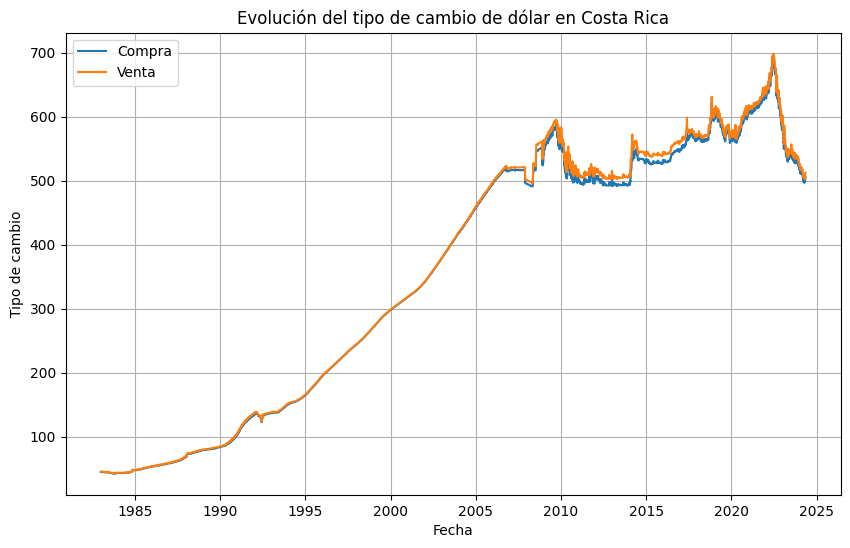

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga de datos
data = df.copy()

# Selección de fechas
fechas = data["DIA"]

# Tipo de cambio de compra
tipo_cambio_compra = data["COMPRA"]

# Tipo de cambio de venta
tipo_cambio_venta = data["VENTA"]

# Gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(fechas, tipo_cambio_compra, label="Compra")
plt.plot(fechas, tipo_cambio_venta, label="Venta")
plt.xlabel("Fecha")
plt.ylabel("Tipo de cambio")
plt.title("Evolución del tipo de cambio de dólar en Costa Rica")
plt.legend()
plt.grid(True)
plt.show()


### 2. Distribución del tipo de cambio de compra y venta 2020 2025 (Dos Graficos):

En este ejercicio, debe visualizar la distribución del tipo de cambio de compra y venta en el período comprendido entre los años 2020 y 2025. Para ello, realizaremos dos subgráficos separados, uno para el tipo de cambio de compra y otro para el tipo de cambio de venta.

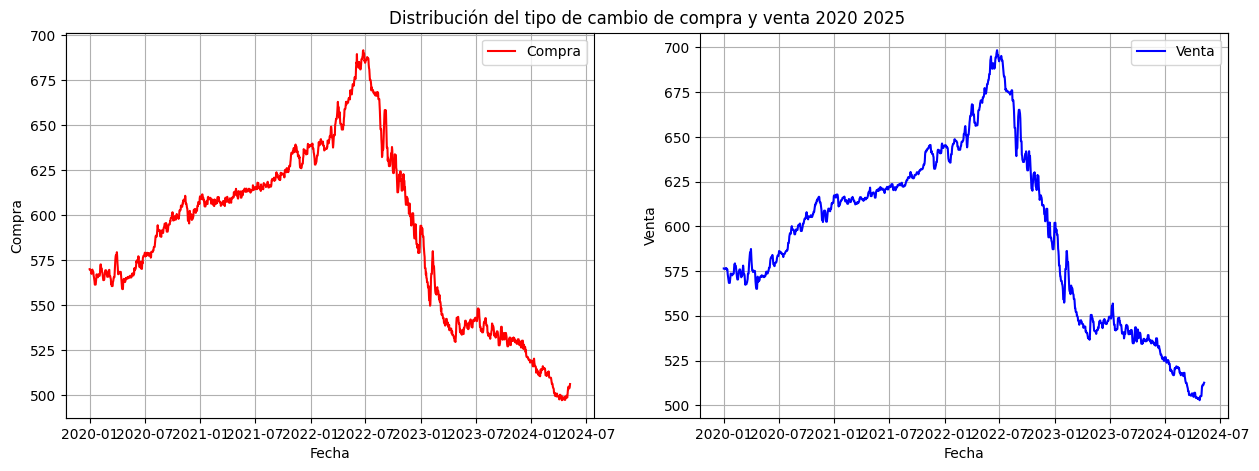

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

#Genero un nuevo data set unicamente con los datos necesarios entre los años 2020 y 2025
data2 = data[(data['DIA'].dt.year >= 2020) & (data['DIA'].dt.year <= 2025)]

# Selección de fechas
fechas = data2["DIA"]

# Tipo de cambio de compra
tipo_cambio_compra = data2["COMPRA"]

# Tipo de cambio de venta
tipo_cambio_venta = data2["VENTA"]

#Oculto los valores default de los ejes X y Y
ax = plt.gca()
# Oculto x-axis
ax.get_xaxis().set_visible(False)
# Oculto y-axis
ax.get_yaxis().set_visible(False)

#Imprime Titulo pricipal del Grafico
plt.rcParams["figure.figsize"] = (20,10)  # pulgadas de ancho y alto
plt.title("Distribución del tipo de cambio de compra y venta 2020 2025")

# Tabla 1x2 y dibujaremos en la celda 1
plt.subplot(1, 2, 1)  
plt.plot(fechas, tipo_cambio_compra, label="Compra", color="red")
plt.xlabel("Fecha")
plt.ylabel("Compra")
plt.legend()
plt.grid(True)


# Tabla 1x2 y dibujaremos en la celda 2
plt.subplot(1, 2, 2)  
plt.plot(fechas, tipo_cambio_venta, label="Venta", color="blue")
plt.xlabel("Fecha")
plt.ylabel("Venta")
plt.legend()
plt.grid(True)

# Dibujamos el conjunto
plt.show()




### 3. Relación entre el tipo de cambio de compra y venta Anual

En este ejercicio, debe explorarar la relación entre el tipo de cambio de compra y venta a lo largo de un año específico, el cual será proporcionado por el usuario mediante un input.

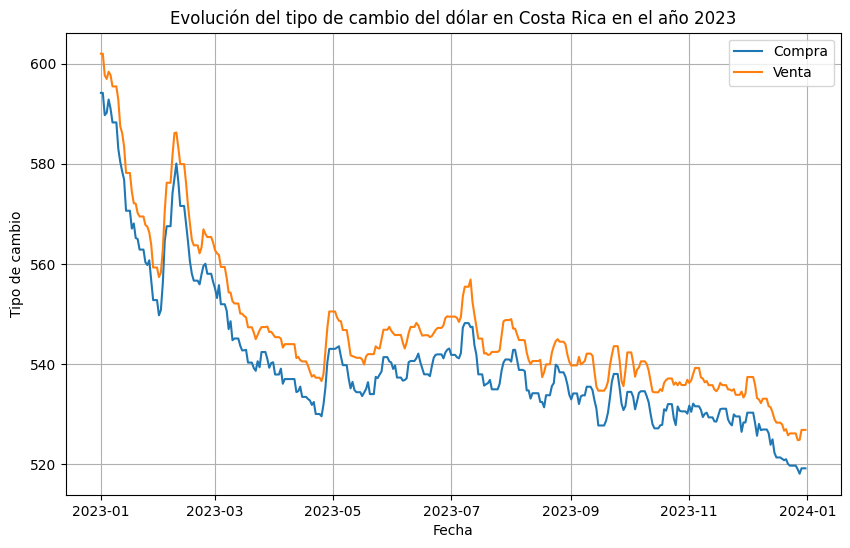

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

#Pregunta el año a consultar
anio = int(input('Digite el año que quiere comparar: '))

#Genero un nuevo data set unicamente con los datos necesarios segun el año digitado por el usuario
data3 = data[data['DIA'].dt.year == anio]

# Selección de fechas
fechas = data3["DIA"]

# Tipo de cambio de compra
tipo_cambio_compra = data3["COMPRA"]

# Tipo de cambio de venta
tipo_cambio_venta = data3["VENTA"]

#print(data3)

# Gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(fechas, tipo_cambio_compra, label="Compra")
plt.plot(fechas, tipo_cambio_venta, label="Venta")
plt.xlabel("Fecha")
plt.ylabel("Tipo de cambio")
plt.title(f"Evolución del tipo de cambio del dólar en Costa Rica en el año {anio}")
plt.legend()
plt.grid(True)
plt.show()




### 4. Gráfico Adicional de Elección Libre

En este ejercicio, tendrás la libertad de crear un gráfico de tu elección relacionado con el tipo de cambio de compra y venta, pero con la condición de que no sea un gráfico lineal.

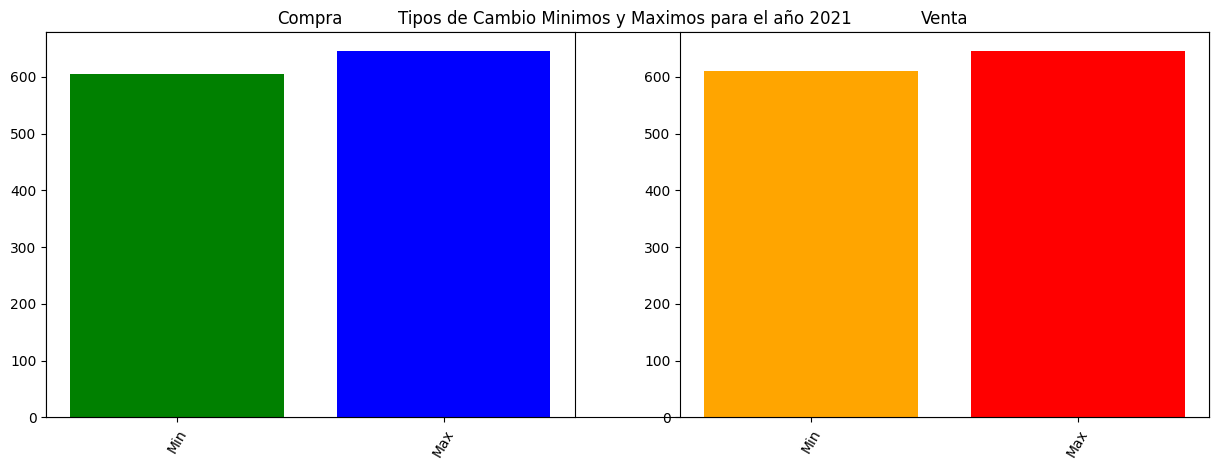

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

##Pregunta el año a consultar
anio = int(input('Digite el año que quiere comparar: '))

data4 = data[data['DIA'].dt.year == anio]

anios_grafico = ['Min','Max']

# Selección de fechas
fechas = data4["DIA"]

# Tipo de cambio de compra
tipo_cambio_compra_min = data4["COMPRA"].min()
tipo_cambio_compra_max = data4["COMPRA"].max()

# Tipo de cambio de venta
tipo_cambio_venta_min = data4["VENTA"].min()
tipo_cambio_venta_max = data4["VENTA"].max()

tc_compra_lista = [tipo_cambio_compra_min,tipo_cambio_venta_max]
tc_venta_lista = [tipo_cambio_venta_min,tipo_cambio_venta_max]

#Oculto los valores default de los ejes X y Y
ax = plt.gca()
# Oculto x-axis
ax.get_xaxis().set_visible(False)
# Oculto y-axis
ax.get_yaxis().set_visible(False)

plt.rcParams["figure.figsize"] = (15,5)  # pulgadas de ancho y alto
plt.title(f"Tipos de Cambio Minimos y Maximos para el año {anio} ")

# Tabla 1x2 y dibujaremos en la celda 1
plt.subplot(1, 2, 1)
plt.title("Compra")
# colores para cada barrra
colors = ['green', 'blue']
plt.bar(range(2),tc_compra_lista,color=colors)
plt.xticks(range(2),anios_grafico,rotation=60)

# Tabla 1x2 y dibujaremos en la celda 2
plt.subplot(1, 2, 2)
plt.title("Venta")  
# colores para cada barrra
colors = ['orange', 'red']
plt.bar(range(2),tc_venta_lista,color=colors)
plt.xticks(range(2),anios_grafico,rotation=60)

# Dibujamos el conjunto
plt.show()
